In [1]:
#Always make all imports in the first cell of the notebook, run them all once.
import cv2
import numpy as np
import math
import glob
import matplotlib.pyplot as plt
import skimage.io as io
from mpl_toolkits.mplot3d import Axes3D

from skimage.color import rgb2gray, rgb2hsv
from scipy import fftpack
from scipy.signal import convolve2d
import skimage
from skimage.util import random_noise
from skimage.filters import median, gaussian, threshold_otsu
from skimage.filters import threshold_otsu, threshold_sauvola
from skimage.filters import roberts, sobel, sobel_h, scharr
from skimage.exposure import rescale_intensity, equalize_hist
from skimage.morphology import binary_erosion, binary_dilation, binary_closing, binary_opening, skeletonize, thin
from skimage import img_as_ubyte
from skimage.io import imread, imshow
from skimage.filters import gaussian, threshold_otsu
from skimage.measure import moments_hu,moments_central,moments_normalized,moments
%matplotlib inline

In [2]:
shapes = ['triple_eighth_down', 'double_eighth_down', 'double_sixteenth_down', 'quadruple_sixteenth_down', "Clef",
          "double_flats", "double_sharps", "flat", "half_note", "quarter_note", "single_eighth note",
          "sharp", "whole_note", "single_sixteenth_note", "single_32th_note", "chord", "bar_line", "44", "42",
          "natural", "dots"]

In [20]:
def read_image(path):
    gray = rgb2gray(io.imread(path))
    # gray = gaussian(gray,1)
    thresh = threshold_otsu(gray)
    normalize = gray > thresh
    return normalize
    

In [21]:
def training_data(shapes):
    x_train = []
    y_train = []
    for i in range(len(shapes)):
        str1 = 'images2/' 
        str2 = i
        str3 = '/*'
        str4 = str1 + str(str2) + str3
        for filename in sorted(glob.glob(str4)):
            print(filename)
            img = read_image(filename) ## cv2.imread reads images in RGB format
            x_train.append(img)
            y_train.append(i)
    return x_train, y_train

In [22]:
x_train, y_train = training_data(shapes)

images2/0\1.png
images2/0\2.png
images2/0\3.png
images2/0\4.png
images2/0\5.jpg
images2/0\6.jpg
images2/0\99999.jpg
images2/1\00000000.JPG
images2/1\09.png
images2/1\1.JPG
images2/1\10.JPG
images2/1\11.JPG
images2/1\12.png
images2/1\12346.png
images2/1\13.JPG
images2/1\14.png
images2/1\2.JPG
images2/1\234.jpg
images2/1\245.jpeg
images2/1\29.JPG
images2/1\3.JPG
images2/1\30.JPG
images2/1\31.JPG
images2/1\321.jpg
images2/1\34.JPG
images2/1\4.JPG
images2/1\5.JPG
images2/1\54.jpg
images2/1\6.JPG
images2/1\654.jpg
images2/1\7.JPG
images2/1\8.JPG
images2/1\9.JPG
images2/1\98.png
images2/1\b463dfa05db7ac6892c2b6a449994764_t.jpeg
images2/1\images (2).png
images2/1\images (3).png
images2/1\images (4).png
images2/1\images.png
images2/2\1.JPG
images2/2\12.JPG
images2/2\1f.jpg
images2/2\2.JPG
images2/2\26.JPG
images2/2\4.JPG
images2/2\5.JPG
images2/2\images (1).png
images2/3\02.PNG10.jpg
images2/3\02.PNG9.jpg
images2/3\1.JPG
images2/3\1.png
images2/3\10.JPG
images2/3\11.JPG
images2/3\12.JPG
images

images2/7\2.jpg
images2/7\3.jpg
images2/7\4.jpg
images2/7\5.JPG
images2/7\gwergerg.jpg
images2/8\00027-17.jpg
images2/8\00044-17.jpg
images2/8\00066-17.jpg
images2/8\00090-17.jpg
images2/8\00123-17.jpg
images2/8\00166-17.jpg
images2/8\00169-17.jpg
images2/8\00184-17.jpg
images2/8\00248-17.jpg
images2/8\00258-17.jpg
images2/8\00270-17.jpg
images2/8\00307-17.jpg
images2/8\00350-17.jpg
images2/8\00403-17.jpg
images2/8\00436-17.jpg
images2/8\00488-17.jpg
images2/8\00494-17.jpg
images2/8\00520-17.jpg
images2/8\00536-17.jpg
images2/8\00546-17.jpg
images2/8\00557-17.jpg
images2/8\00558-17.jpg
images2/8\00593-17.jpg
images2/8\00612-17.jpg
images2/8\00641-17.jpg
images2/8\00646-17.jpg
images2/8\00668-17.jpg
images2/8\00683-17.jpg
images2/8\00727-17.jpg
images2/8\00728-17.jpg
images2/8\00751-17.jpg
images2/8\00763-17.jpg
images2/8\00775-17.jpg
images2/8\00805-17.jpg
images2/8\00806-17.jpg
images2/8\00841-17.jpg
images2/8\00848-17.jpg
images2/8\00849-17.jpg
images2/8\00888-17.jpg
images2/8\00919-

images2/11\Screenshot 2021-01-12 080628.jpg
images2/12\00009-6.jpg
images2/12\00045-24.jpg
images2/12\00060-24.jpg
images2/12\00062-6.jpg
images2/12\00113-6.jpg
images2/12\00135-6.jpg
images2/12\00182-24.jpg
images2/12\00198-24.jpg
images2/12\00226-6.jpg
images2/12\00231-6.jpg
images2/12\00242-24.jpg
images2/12\00245-6.jpg
images2/12\00267-24.jpg
images2/12\00302-6.jpg
images2/12\00304-24.jpg
images2/12\00310-6.jpg
images2/12\00323-24.jpg
images2/12\00332-6.jpg
images2/12\00348-6.jpg
images2/12\00374-6.jpg
images2/12\00432-24.jpg
images2/12\00449-24.jpg
images2/12\00468-6.jpg
images2/12\00477-24.jpg
images2/12\00480-24.jpg
images2/12\00516-6.jpg
images2/12\00564-24.jpg
images2/12\00586-6.jpg
images2/12\00591-24.jpg
images2/12\00606-6.jpg
images2/12\00609-6.jpg
images2/12\00627-6.jpg
images2/12\00645-24.jpg
images2/12\00650-6.jpg
images2/12\00660-24.jpg
images2/12\00699-24.jpg
images2/12\00704-24.jpg
images2/12\00729-6.jpg
images2/12\00777-6.jpg
images2/12\00784-6.jpg
images2/12\00792-6

images2/16\1177.jpg
images2/16\1189.jpg
images2/16\119041.png
images2/16\1198.jpg
images2/16\1211.jpg
images2/16\1237.jpg
images2/16\1432.png
images2/16\2.JPG
images2/16\2154.jpg
images2/16\221.png
images2/16\2211.jpg
images2/16\2211.png
images2/16\22113.png
images2/16\221133.png
images2/16\2224.png
images2/16\2230.jpg
images2/16\2287.jpg
images2/16\321.png
images2/16\3355.png
images2/16\4433.jpg
images2/16\5566.jpg
images2/16\6611.jpg
images2/16\9987.png
images2/17\1.JPG
images2/17\1000.PNG
images2/17\3 - Copy.png
images2/17\3.png
images2/17\ASCCASCASCA.jpg
images2/17\CCDACCD.png
images2/17\FFFFFF.jpg
images2/18\10.PNG1.jpg
images2/18\Screenshot 2021-01-12 203952.jpg
images2/18\adgadfg.jpg
images2/18\dd.jpg
images2/19\05.PNG5.jpg
images2/19\215.png
images2/19\5.png
images2/19\6.jpg
images2/19\98765.png
images2/19\IMG-20150411-WA0000.jpg
images2/19\dsfgsdfgdfg.jpg
images2/20\00009-6.jpg
images2/20\00062-6.jpg
images2/20\00113-6.jpg
images2/20\00135-6.jpg
images2/20\00226-6.jpg
images2/

In [23]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
print(x_train.shape)

(1288,)


In [24]:
def show_images(images, titles=None):
    # This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        plt.axis('off')
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [25]:
# show_images(x_train)
print(y_train)

[ 0  0  0 ... 20 20 20]


In [26]:
def find_regionprop(img):
    labeled_image = skimage.measure.label(img, connectivity=2, return_num=True, background=1)
    components = skimage.measure.regionprops(labeled_image[0])
    return components

In [27]:
def regionVolume(region):
    width=region.shape[1]
    height=region.shape[0]
    
    #print("area: ", width, height)
    
    area=width*height
  
    blacks = 0
    for color in region.flatten():
        if color == 0:
            blacks += 1
    
    
    return (blacks/area)
    '''
    area = region.shape[0]*region.shape[1]
    b_area = len(region == 0)
    # print("Black area= ", b_area)
    vol = b_area/area
    return vol
    '''

In [28]:
def region16(image):
    regions = []
    for i in range(4):
        for j in range(4):
            regions.append(image[i*image.shape[0]//4: (i+1)*image.shape[0]//2, j*image.shape[1]//4 : (j+1)*image.shape[1]//4])
        
    return regions

In [55]:
def extract_features(img):
    features = []
    features.append(img.shape[0]/img.shape[1])
    moments = cv2.HuMoments(cv2.moments((img).astype(np.uint8))).flatten()
    for moment in moments:
        features.append(moment)
    '''
    w1=img.shape[1]
    h1=img.shape[0]
    m=h1/4
    n=w1/4
    part_1 = img[:int(m),:int(n)]              #bottom left
    part_2 = img[:int(m):,int(n):2*int(n)]              #bottom right
    part_3 = img[:int(m):,2*int(n):3*int(n)]              #top left
    part_4 = img[:int(m):,3*int(n):]
    
    part_5 = img[int(m):2*int(m),:int(n)]              #bottom left
    part_6 = img[int(m):2*int(m),int(n):2*int(n)]              #bottom right
    part_7 = img[int(m):2*int(m),2*int(n):3*int(n)]              #top left
    part_8 = img[int(m):2*int(m):,3*int(n):]
    
    part_9 = img[2*int(m):3*int(m),:int(n)]              #bottom left
    part_10 = img[2*int(m):3*int(m),int(n):2*int(n)]              #bottom right
    part_11= img[2*int(m):3*int(m),2*int(n):3*int(n)]              #top left
    part_12 = img[2*int(m):3*int(m),3*int(n):]
    
    part_13= img[3*int(m):,:int(n)]              #bottom left
    part_14= img[3*int(m):,int(n):2*int(n)]              #bottom right
    part_15= img[3*int(m):,2*int(n):3*int(n)]              #top left
    part_16= img[3*int(m):,3*int(n):]

    img_arr=[part_1, part_2, part_3, part_4, part_5, part_6, part_7, part_8, part_9, part_10, part_11, part_12, part_13, part_14, part_15, part_16]
    '''
    
    
    #     print(part_3.shape)

    #for x in range (len(img_arr)):
        #features.append(regionVolume(img_arr[x]))
    regions = region16(img)
    for region in regions:
        volume = regionVolume(region)
        features.append(volume)
    #print(features)
    return features

In [56]:
number_of_features = 24
training_features = np.zeros((x_train.shape[0],number_of_features))

In [57]:
for i in range(training_features.shape[0]):
    #component = find_regionprop(x_train[i])
    # print(y_train[i])
    features = extract_features(x_train[i])
    # print(features)
    training_features[i,:] = features
    

In [58]:
def calculateDistance(x1, x2):
    distance = np.linalg.norm(x1-x2)
    return distance

In [59]:
def KNN(test_point, training_features, y_train, k): 
    classification = 0
    
    minDist = [999999 for i in range(k)]
    minClass = [3 for i in range(k)]
    
    
    features_triple_eighth_down = training_features[y_train == 0]
    features_double_eighth_down = training_features[y_train == 1]
    features_double_sixteenth_down = training_features[y_train == 2]
    features_quadruple_sixteenth_down = training_features[y_train == 3]
    features_clef = training_features[y_train == 4]
    features_double_flat = training_features[y_train == 5]
    features_double_sharp = training_features[y_train == 6]
    features_flat = training_features[y_train == 7]
    features_half_note = training_features[y_train == 8]
    features_quarter_note = training_features[y_train == 9]
    features_eighth_note = training_features[y_train == 10]
    features_sharp = training_features[y_train == 11]
    # features_natural = training_features[y_train==12]
    features_whole_note = training_features[y_train == 12]
    features_sixteenth_note = training_features[y_train == 13]
    features_32th_note = training_features[y_train == 14]
    # features_bar_line = training_features[y_train==15]
    # features_triple_sixteenth = training_features[y_train==15]
    features_chord = training_features[y_train == 15]
    features_bar_line = training_features[y_train == 16]
    features_four_four = training_features[y_train == 17]
    features_four_two = training_features[y_train == 18]
    features_natural = training_features[y_train == 19]
    features_dot = training_features[y_train == 20]

    
    for i in features_triple_eighth_down:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 0
    for i in features_double_eighth_down:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 1
    for i in features_double_sixteenth_down:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 2
    for i in features_quadruple_sixteenth_down:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 3
    for i in features_clef:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 4
    for i in features_double_flat:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 5
    for i in features_double_sharp:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 6
    for i in features_flat:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 7
    for i in features_half_note:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 8
    for i in features_quarter_note:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 9
    for i in features_eighth_note:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 10
    for i in features_sharp:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 11
    for i in features_whole_note:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 12
    for i in features_sixteenth_note:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 13
    for i in features_32th_note:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 14
    for i in features_chord:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 15
    for i in features_bar_line:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 16
    for i in features_four_four:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 17
    for i in features_four_two:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 18
    for i in features_natural:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 19
    for i in features_dot:
        c = calculateDistance(i, test_point)
        if c < max(minDist):
            minDist[minDist.index(max(minDist))] = c
            minClass[minDist.index(max(minDist))] = 20
            
    # ------------------------------------------------------------------------------------------------------
    
    zero = minClass.count(0)
    one = minClass.count(1)
    two = minClass.count(2)
    three = minClass.count(3)
    four = minClass.count(4)
    five = minClass.count(5)
    six = minClass.count(6)
    seven = minClass.count(7)
    eight = minClass.count(8)
    nine = minClass.count(9)
    ten = minClass.count(10)
    eleven = minClass.count(11)
    twelve = minClass.count(12)
    thirteen = minClass.count(13)
    fourteen = minClass.count(14)
    fifteen = minClass.count(15)
    sixteen = minClass.count(16)
    seventeen = minClass.count(17)
    eighteen = minClass.count(18)
    nineteen = minClass.count(19)
    twenty = minClass.count(20)
    
    temp = [zero, one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen,
            fifteen, sixteen, seventeen, eighteen, nineteen, twenty]
    classification = temp.index(max(temp))
    return classification

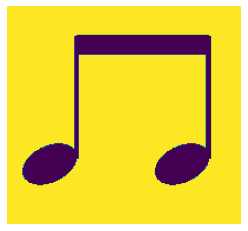

Actual class : double_eighth_down
---------------------------------------
K-Nearest Neighbours Prediction          : double_eighth_down


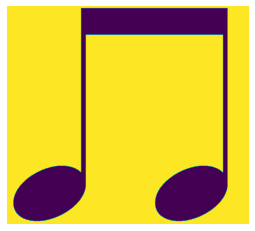

Actual class : double_eighth_down
---------------------------------------
K-Nearest Neighbours Prediction          : double_eighth_down


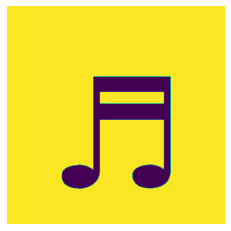

Actual class : double_sixteenth_down
---------------------------------------
K-Nearest Neighbours Prediction          : Clef


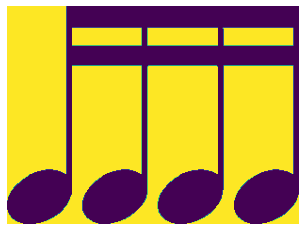

Actual class : quadruple_sixteenth_down
---------------------------------------
K-Nearest Neighbours Prediction          : quadruple_sixteenth_down


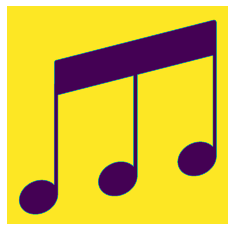

Actual class : triple_eighth_down
---------------------------------------
K-Nearest Neighbours Prediction          : triple_eighth_down


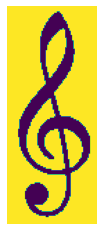

Actual class : Clef
---------------------------------------
K-Nearest Neighbours Prediction          : Clef


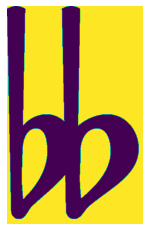

Actual class : double_flats
---------------------------------------
K-Nearest Neighbours Prediction          : double_flats


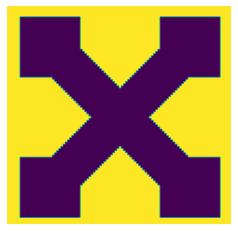

Actual class : double_sharps
---------------------------------------
K-Nearest Neighbours Prediction          : double_sharps


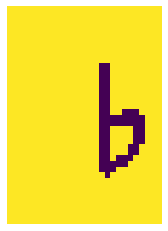

Actual class : flat
---------------------------------------
K-Nearest Neighbours Prediction          : quadruple_sixteenth_down


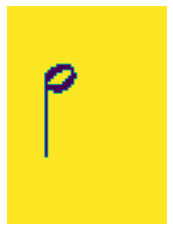

Actual class : half_note
---------------------------------------
K-Nearest Neighbours Prediction          : double_sixteenth_down


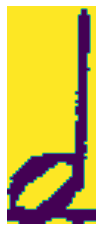

Actual class : half_note
---------------------------------------
K-Nearest Neighbours Prediction          : half_note


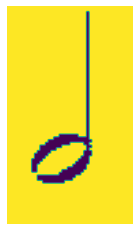

Actual class : half_note
---------------------------------------
K-Nearest Neighbours Prediction          : quarter_note


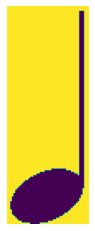

Actual class : quarter_note
---------------------------------------
K-Nearest Neighbours Prediction          : quarter_note


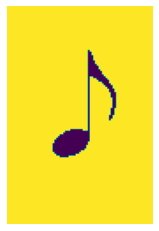

Actual class : single_eighth note
---------------------------------------
K-Nearest Neighbours Prediction          : half_note


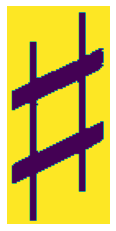

Actual class : sharp
---------------------------------------
K-Nearest Neighbours Prediction          : Clef


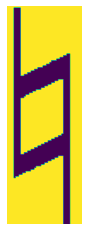

Actual class : natural
---------------------------------------
K-Nearest Neighbours Prediction          : natural


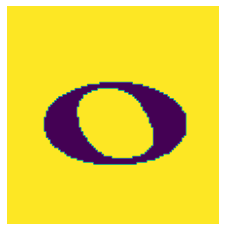

Actual class : whole_note
---------------------------------------
K-Nearest Neighbours Prediction          : whole_note


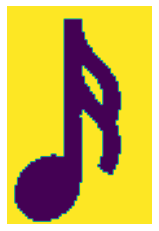

Actual class : single_sixteenth_note
---------------------------------------
K-Nearest Neighbours Prediction          : single_eighth note


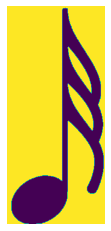

Actual class : single_32th_note
---------------------------------------
K-Nearest Neighbours Prediction          : single_32th_note


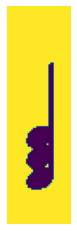

Actual class : chord
---------------------------------------
K-Nearest Neighbours Prediction          : chord


Actual class : bar_line
---------------------------------------
K-Nearest Neighbours Prediction          : bar_line


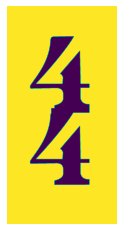

Actual class : 44
---------------------------------------
K-Nearest Neighbours Prediction          : single_eighth note


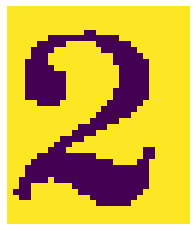

Actual class : 42
---------------------------------------
K-Nearest Neighbours Prediction          : 42


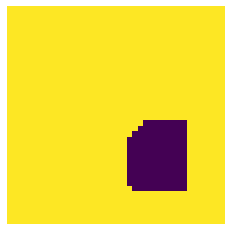

Actual class : dots
---------------------------------------
K-Nearest Neighbours Prediction          : whole_note


In [60]:
### Run this after implementing the model functions

### DO NOT CHANGE THESE VALUES ###
test_images = sorted(glob.glob('test/*'))

true_values = [1, 1, 2, 3, 0, 4, 5, 6, 7, 8, 8, 8, 9, 10, 11, 19, 12, 13, 14, 15, 16, 17, 18, 20]

knns = []
for i in range(len(test_images)):
    # Read each image in the test directory, preprocess it and extract its features.
    img_original = read_image(test_images[i])
    #components = find_regionprop(img_original)
    test_point = extract_features(img_original)
    
    # Visualize each test figure. 
    fig = plt.figure()
    plt.imshow(img_original)
    plt.axis("off")
    plt.show()
    
    # Print the actual class of each test figure. 
    print("Actual class :", shapes[true_values[i]])
    print("---------------------------------------")

    # ------------------------------------------------------------------------------------------------------
    # TODO 18: Calculate the prediction of each classifier (Minimum Distance, Nearest Neighbour, K-Nearest Neighbour)
    k = 3 ## Question: what will happen if we increase the value of k?
    knn_prediction = KNN(test_point,training_features,y_train,k)
    knns.append(knn_prediction)
    
    
    # ------------------------------------------------------------------------------------------------------

    print("K-Nearest Neighbours Prediction          :", shapes[knn_prediction])
    print("===========================================================================")
    

In [61]:
# ------------------------------------------------------------------------------------------------------
# TODO 19 : Calculate the number of total predictions (the size of the test set) (~1 line)
total_predictions = np.array(test_images).shape[0]
# ------------------------------------------------------------------------------------------------------


# ------------------------------------------------------------------------------------------------------
# TODO 20 : Calculate the number of correct predictions for MDC, NN and KNN. (~ 3 lines)
# Hint: You may need to add very simple code in the previous cell
# (e.g. store predictions in some array for each classifier)
correct_knn = 0
for i in range(len(true_values)):
    if true_values[i] == knns[i]:
        correct_knn+=1

# ------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------
# TODO 21 : Calculate the accuracy for each of MDC, NN and KNN (~ 3 lines)
accuracy_knn = correct_knn/len(true_values)
# ------------------------------------------------------------------------------------------------------


print("K-Nearest Neighbour Classifier Accuracy: ", accuracy_knn, "%")

K-Nearest Neighbour Classifier Accuracy:  0.625 %
